Best value of k: 25, with highest F1-score: 0.8968


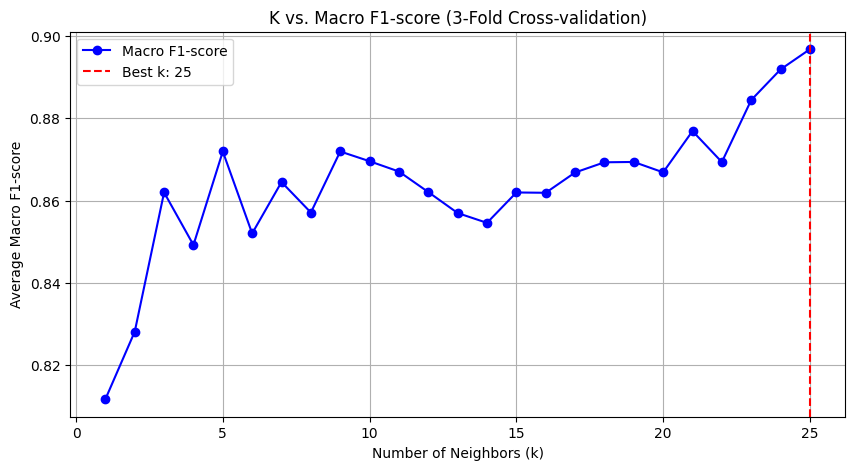

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset (Replace this with actual dataset)
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define k values to test
k_values = list(range(1, 26))

# Perform 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store F1-scores for different k values
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    fold_f1_scores = []  # Store F1-scores for each fold
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Train the model
        knn.fit(X_fold_train, y_fold_train)
        
        # Predict on validation set
        y_pred = knn.predict(X_fold_val)
        
        # Compute F1-score (macro)
        f1 = f1_score(y_fold_val, y_pred, average='macro')
        fold_f1_scores.append(f1)
    
    # Store the average F1-score for this k
    f1_scores.append(np.mean(fold_f1_scores))

# Find the best k (highest F1-score)
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best value of k: {best_k}, with highest F1-score: {best_f1:.4f}")

# Plot F1-score vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label="Macro F1-score")
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Macro F1-score")
plt.title("K vs. Macro F1-score (3-Fold Cross-validation)")
plt.legend()
plt.grid()
plt.show()
